<a href="https://colab.research.google.com/github/terka-creator/Linkedin-data-job-offers/blob/main/Linkedin_data_job_offers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[LinkedIn Data Jobs Dataset](https://www.kaggle.com/datasets/joykimaiyo18/linkedin-data-jobs-dataset/data)

In [ ]:
#loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#opening files from local storage
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving clean_jobs.csv to clean_jobs.csv
User uploaded file "clean_jobs.csv" with length 1521021 bytes


In [ ]:
df = pd.read_csv('clean_jobs.csv',index_col='id')
print(df.head())

              title    company           location  \
id                                                  
1      Data Analyst       Meta       New York, NY   
2      Data Analyst       Meta  San Francisco, CA   
3      Data Analyst       Meta    Los Angeles, CA   
4      Data Analyst       Meta     Washington, DC   
5   Data Analyst II  Pinterest        Chicago, IL   

                                                 link    source date_posted  \
id                                                                            
1   https://www.linkedin.com/jobs/view/data-analys...  LinkedIn  2025-04-14   
2   https://www.linkedin.com/jobs/view/data-analys...  LinkedIn  2025-04-14   
3   https://www.linkedin.com/jobs/view/data-analys...  LinkedIn  2025-04-14   
4   https://www.linkedin.com/jobs/view/data-analys...  LinkedIn  2025-04-14   
5   https://www.linkedin.com/jobs/view/data-analys...  LinkedIn  2025-04-16   

    work_type  employment_type  \
id                               
1     

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 327 entries, 1 to 741
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            327 non-null    object 
 1   company          327 non-null    object 
 2   location         327 non-null    object 
 3   link             327 non-null    object 
 4   source           327 non-null    object 
 5   date_posted      327 non-null    object 
 6   work_type        0 non-null      float64
 7   employment_type  0 non-null      float64
 8   description      327 non-null    object 
dtypes: float64(2), object(7)
memory usage: 25.5+ KB
None


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

title                0
company              0
location             0
link                 0
source               0
date_posted          0
work_type          327
employment_type    327
description          0
dtype: int64


In [ ]:
#dropping columns without entries
col_to_drop = ['work_type','employment_type']
df.drop(columns=col_to_drop, inplace=True)

In [ ]:
for col in df.columns:
  num_unique = df[col].nunique()
  print("Number of unique values in column " + col + " : " + str(num_unique))

#print(df['title'].nunique())

Number of unique values in column title : 149
Number of unique values in column company : 193
Number of unique values in column location : 120
Number of unique values in column link : 327
Number of unique values in column source : 1
Number of unique values in column date_posted : 8
Number of unique values in column description : 269


In [ ]:
#dates of posted jobs
print('The oldest job posted:')
print(df['date_posted'].min())
print('The newest job posted:')
print(df['date_posted'].max())

The oldest job posted:
2025-04-10
The newest job posted:
2025-04-17


In [ ]:
#checking the titles
print(df['title'].value_counts(ascending=False).head(20))

title
Data Analyst                                       53
Data Engineer                                      29
Data Scientist, Product Analytics                  26
Data Scientist                                     23
Data Engineer, Product Analytics                   19
Machine Learning Engineer                           9
Data Products Analyst, YouTube                      4
Data Engineer I, SCOT - AIM                         4
Data Analyst II                                     3
Data Analyst I                                      3
Business Data Analyst                               3
Junior Data Analyst                                 2
Senior Data Analyst                                 2
Sr. Data Analyst                                    2
Data Scientist, Product, Sustainability             2
Data Scientist I                                    2
Data Engineer I (Full Time) United States           2
Data Engineer III                                   2
Data Engineer, E-Comme

In [ ]:
#there are some non-english titles, let's find them
non_eng_titles = df[df['title'].str.contains('[^\x00-\x7F]+')]
print(non_eng_titles)

#there are 7 records with non-english title, we will change their names to english
df['new_title']=df['title'].str.replace(r'(?i)\bAnalista\b', 'Analyst',regex=True)
df['new_title']=df['new_title'].str.replace('Cientista de Dados', 'Data Scientist', regex=False)

                                                title          company  \
id                                                                       
94            Analista de Dados Junior - São Paulo/SP           Shopee   
131               Analista de Dados Júnior | Data Viz  americanas s.a.   
141                          Analista de Dados Júnior   Cogna Educação   
150          Analista de Business Intelligence Júnior            iFood   
242               Analista de Análise de Dados Junior          C6 Bank   
399  Cientista de Dados II - Área Prevenção a Fraudes    Itaú Unibanco   
425                      Cientista de Dados - Estágio  SMi Engineering   

                           location  \
id                                    
94     São Paulo, São Paulo, Brazil   
131          Greater Rio de Janeiro   
141                          Brazil   
150       Osasco, São Paulo, Brazil   
242    São Paulo, São Paulo, Brazil   
399    São Paulo, São Paulo, Brazil   
425  Santo André, São

In [ ]:
#creating column to categorize titles into few job categories
job_categories = ["Data Science", "Data Analytics", "Data Engineering", "Machine Learning"]

data_science = "Data Scientist|NLP"
data_analyst = "Analyst|Analytics|analyst|ANALYST"
data_engineer = "Data Engineer|ETL|Architect|Infrastructure"
ml_engineer = "Machine Learning|ML|Big Data|AI"

conditions = [(df["new_title"].str.contains(data_science)),(df["new_title"].str.contains(data_analyst)),(df["new_title"].str.contains(data_engineer)),(df["new_title"].str.contains(ml_engineer))]

df['job_category'] = np.select(conditions, job_categories,default="Other")

print(df[['title','job_category']].head(20))

                                                title    job_category
id                                                                   
1                                        Data Analyst  Data Analytics
2                                        Data Analyst  Data Analytics
3                                        Data Analyst  Data Analytics
4                                        Data Analyst  Data Analytics
5                                     Data Analyst II  Data Analytics
6                                        Data Analyst  Data Analytics
7   Data Analyst, Production Finance Operations & ...  Data Analytics
8                            Data Analyst - Marketing  Data Analytics
9                                        Data Analyst  Data Analytics
14                                    Data Analyst II  Data Analytics
15                                    Data Analyst II  Data Analytics
16        Data Analyst, Global Partnerships & Content  Data Analytics
29                  

<ipython-input-10-7b488a2c0bbb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y ='job_category', order=col_alph, palette='rocket_r')


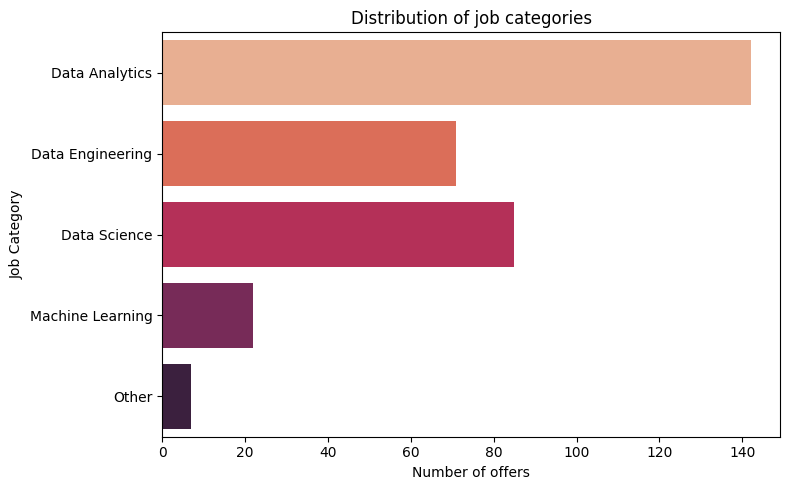

In [ ]:
#distribution of job categories
plt.figure(figsize=(8, 5))
col_alph = ['Data Analytics', 'Data Engineering','Data Science','Machine Learning','Other']
sns.countplot(data=df, y ='job_category', order=col_alph, palette='rocket_r')
plt.title('Distribution of job categories')
plt.ylabel('Job Category')
plt.xlabel('Number of offers')
plt.tight_layout()
plt.show()

In [ ]:
#unique values for every job category
print(df.groupby('job_category')['title'].nunique())

job_category
Data Analytics      57
Data Engineering    37
Data Science        34
Machine Learning    14
Other                7
Name: title, dtype: int64


In [ ]:
#checking Other category
print(df[df['job_category']=='Other']['title'].unique())

['Data Associate - Gurgaon' 'Data Intern' 'Junior Frontend Developer'
 'Research And Development Scientist'
 'Software Engineer 5, Data Clean Room' 'Remote Engineer, Data, I'
 'Data Operation Engineer I']


<ipython-input-13-48184439e7e2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_titles.values, y=top_5_titles.index, palette='rocket_r')


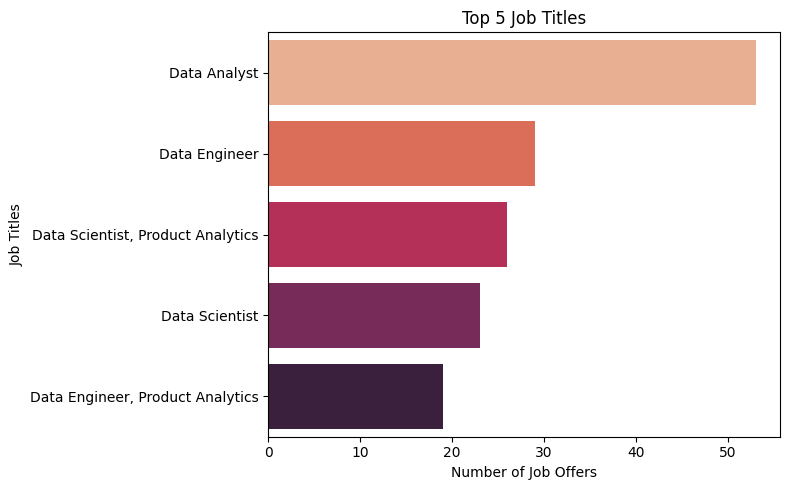

In [ ]:
# Top 5 job titles
top_5_titles = df['title'].value_counts().head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_5_titles.values, y=top_5_titles.index, palette='rocket_r')

# Add titles and labels
plt.title('Top 5 Job Titles')
plt.xlabel('Number of Job Offers')
plt.ylabel('Job Titles')
plt.tight_layout()
plt.show()

<ipython-input-14-fb700471783a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_locations.values, y=top_10_locations.index, palette='rocket_r')


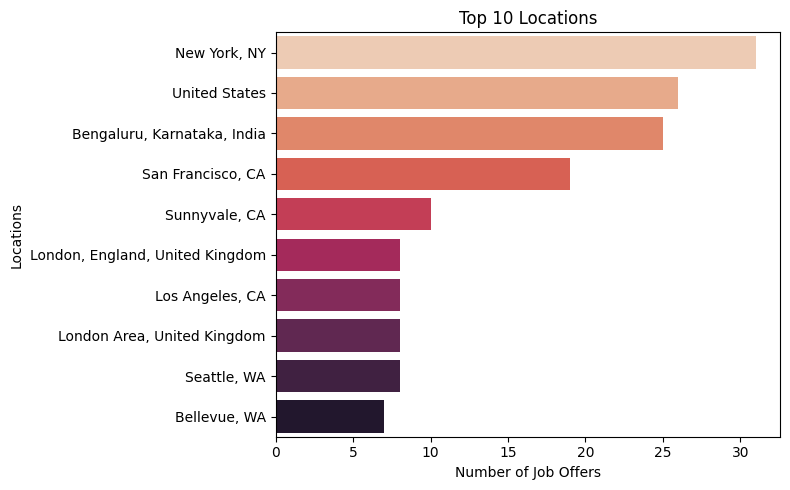

In [ ]:
#top 10 locations
top_10_locations = df['location'].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_10_locations.values, y=top_10_locations.index, palette='rocket_r')

# Add titles and labels
plt.title('Top 10 Locations')
plt.xlabel('Number of Job Offers')
plt.ylabel('Locations')
plt.tight_layout()
plt.show()

<ipython-input-15-6ba16989eee4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_companies.values, y=top_10_companies.index, palette='rocket_r')


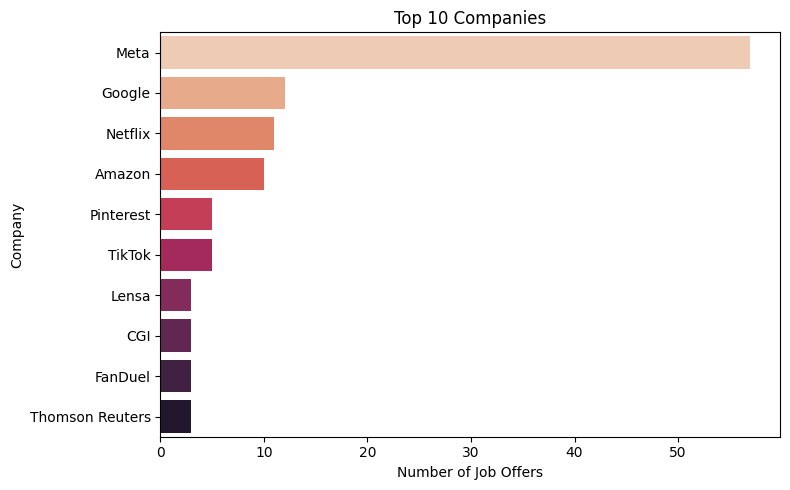

In [ ]:
#top 10 companies
top_10_companies = df['company'].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_10_companies.values, y=top_10_companies.index, palette='rocket_r')

# Add titles and labels
plt.title('Top 10 Companies')
plt.xlabel('Number of Job Offers')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

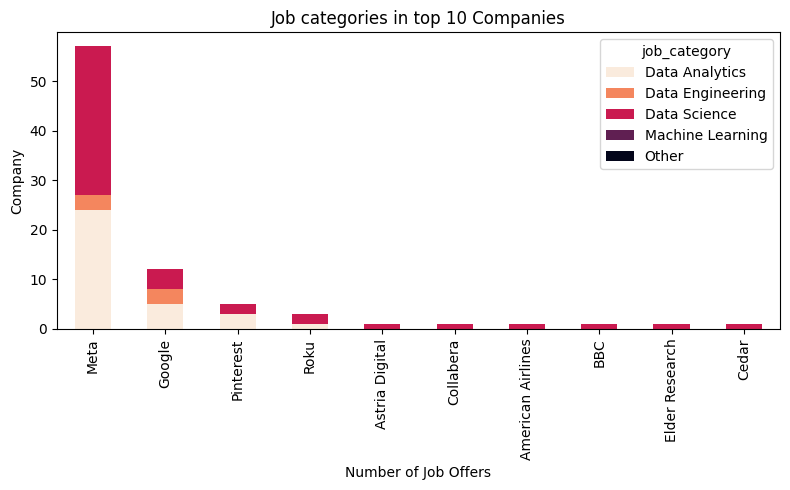

In [ ]:
#job categories by top 10 companies
job_cat_companies = df.groupby(['company','job_category']).size().unstack().fillna(0).sort_values(by='Data Science',ascending=False).head(10)
job_cat_companies.plot(kind='bar',stacked=True, figsize=(8,5),colormap='rocket_r')
# Add titles and labels
plt.title('Job categories in top 10 Companies')
plt.xlabel('Number of Job Offers')
plt.ylabel('Company')
plt.tight_layout()
plt.show()


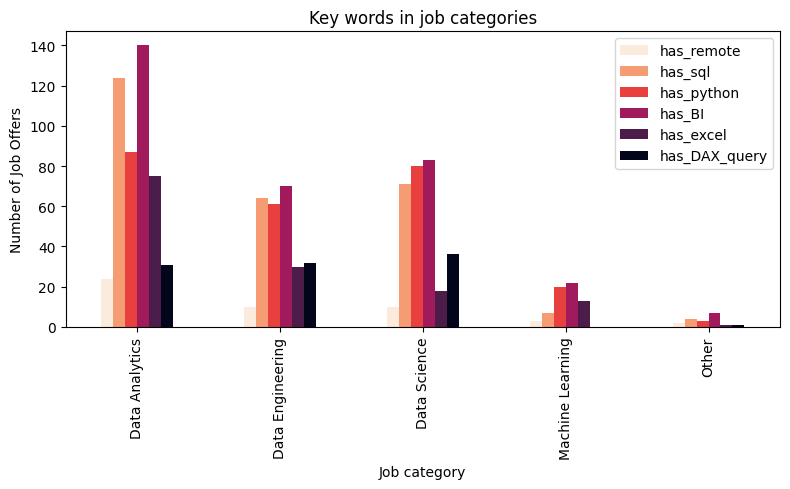

In [ ]:
#checking key words in description
df['has_remote'] = df['description'].str.contains('remote|remotely|work from home', case=False, na=False).astype(int)
df['has_sql'] = df['description'].str.contains(r'\b\w*sql\w*\b', case=False, na=False).astype(int)
df['has_python'] = df['description'].str.contains('python', case=False, na=False).astype(int)
df['has_BI'] = df['description'].str.contains('bi|tableau|power bi', case=False, na=False).astype(int)
df['has_excel'] = df['description'].str.contains('excel', case=False, na=False).astype(int)
df['has_DAX_query'] = df['description'].str.contains('DAX|query', case=False, na=False).astype(int)

key_words = ['has_remote','has_sql','has_python','has_BI','has_excel','has_DAX_query']

job_cat_key_words = df.groupby('job_category')[key_words].sum()

#distribution of key words in job categories
job_cat_key_words.plot(kind='bar',figsize=(8,5),colormap='rocket_r')
# Add titles and labels
plt.title('Key words in job categories')
plt.xlabel('Job category')
plt.ylabel('Number of Job Offers')
plt.tight_layout()
plt.show()

Ukradzione od Pana z kaggle [EDA and FE on LinkedIn Job Data](https://www.kaggle.com/code/mehmetakifciftci/eda-and-fe-on-linkedin-job-data#Seniority-Level-Distribution)

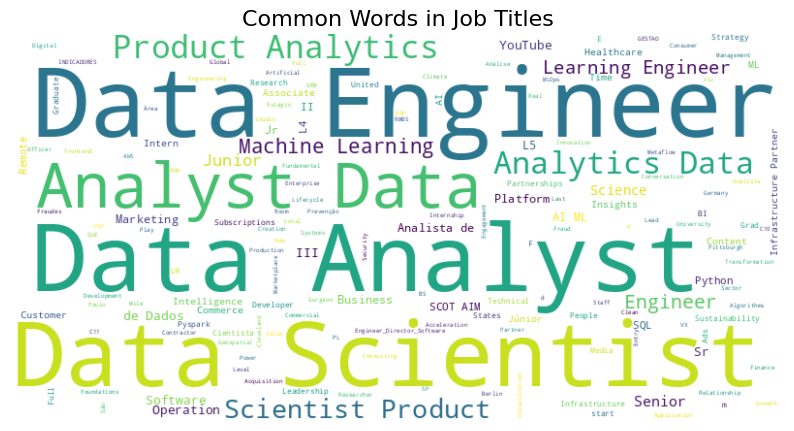

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(10,6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['title']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Job Titles', fontsize=16)
plt.show()

Skradzione od gościa wyżej ale chujowo to działa szczerze mówiąc

In [ ]:
# Create seniority
def get_seniority(new_title):
    new_title = new_title.lower()
    if 'senior' in new_title or 'sr' in new_title or ' iii' in new_title:
        return 'Senior'
    elif 'junior' in new_title or ' i' in new_title or 'jr' in new_title:
        return 'Junior'
    elif ' ii ' in new_title:
        return 'Mid'
    elif 'associate' in new_title:
        return 'Associate'
    elif 'manager' in new_title:
        return 'Manager'
    elif 'lead|ii' in new_title:
        return 'Lead'
    elif 'intern' in new_title:
        return 'Intern'
    else:
        return 'Other'

df['seniority'] = df['new_title'].apply(get_seniority)
print(df['seniority'].value_counts())

seniority
Other        257
Junior        47
Senior        20
Associate      3
Name: count, dtype: int64


In [ ]:
#creating level of seniority column
seniority_level = ["Senior", "Mid", "Junior", "Intern",'Associate','Manager','Lead']

senior = "senior|Senior|III|Sr|Sr.|Sr.|SENIOR"
mid = "Mid|II|Intermediate|intermediate|mid|MID"
junior = "junior|Junior|I|jr|Jr|jùnior|Jùnior|JUNIOR"
intern = "Intern|intern|INTERN"
associate = "Associate|associate|ASSOCIATE"
manager = "Manager|manager|MANAGER"
lead = "Lead|lead|LEAD"

conditions_l = [(df["new_title"].str.contains(senior)),(df["new_title"].str.contains(mid)),(df["new_title"].str.contains(junior)),(df["new_title"].str.contains(intern)),(df["new_title"].str.contains(associate)),(df["new_title"].str.contains(manager)),(df["new_title"].str.contains(lead))]

df['level'] = np.select(conditions_l, seniority_level,default="No information")

print(df[['title','level']].head(20))

                                                title           level
id                                                                   
1                                        Data Analyst  No information
2                                        Data Analyst  No information
3                                        Data Analyst  No information
4                                        Data Analyst  No information
5                                     Data Analyst II             Mid
6                                        Data Analyst  No information
7   Data Analyst, Production Finance Operations & ...          Junior
8                            Data Analyst - Marketing  No information
9                                        Data Analyst  No information
14                                    Data Analyst II             Mid
15                                    Data Analyst II             Mid
16        Data Analyst, Global Partnerships & Content  No information
29                  

In [ ]:
print(df['level'].value_counts())

level
No information    243
Junior             55
Senior             20
Mid                 4
Associate           3
Lead                2
Name: count, dtype: int64


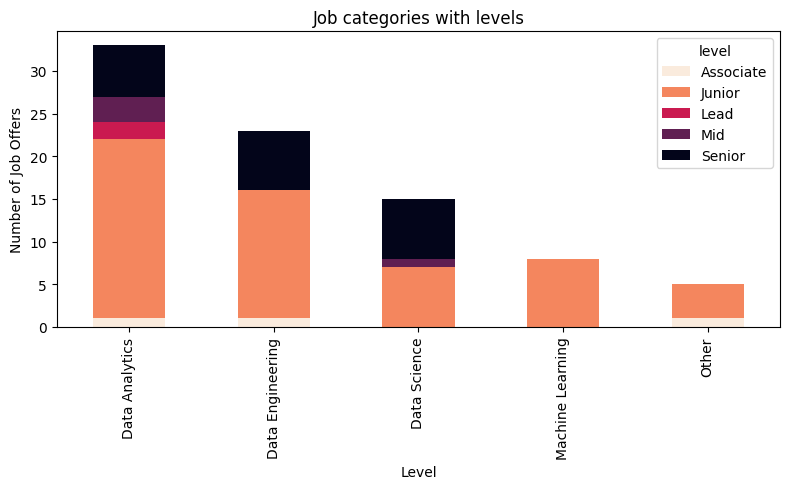

In [ ]:
#in which job category what lvl is the most search
level_no_info = df[df['level']!='No information']
level_cat = level_no_info.groupby(['job_category','level']).size().unstack().fillna(0)
level_cat.plot(kind='bar',stacked=True, figsize=(8,5),colormap='rocket_r')
# Add titles and labels
plt.title('Job categories with levels')
plt.xlabel('Job category')
plt.ylabel('Number of Job Offers')
plt.tight_layout()